In [224]:
import pandas as pd
import os 
from docx import Document
from docx.enum.text import WD_COLOR_INDEX, WD_LINE_SPACING
from docx.enum.table import WD_TABLE_ALIGNMENT
from docx.shared import Pt
from tika import parser
import re
import random
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize


In [225]:
def get_cefr(folder_path, document_heading):
    #gets the English Vocabulary Profile data
    evp = pd.read_excel("evp_list.xlsx")

    evp = evp.drop(columns=["Column1", "Details"])

    evp.sort_values(by="Level", axis=0, inplace=True, ascending=True)

    #wordlists
    a1 = evp[evp["Level"] == "A1"]
    a2 = evp[evp["Level"] == "A2"]
    b1 = evp[evp["Level"] == "B1"]
    b2 = evp[evp["Level"] == "B2"]
    c1 = evp[evp["Level"] == "C1"]
    c2 = evp[evp["Level"] == "C2"]

    a1_list = a1["Base Word"].tolist()
    a2_list = a2["Base Word"].tolist()
    b1_list = b1["Base Word"].tolist()
    b2_list = b2["Base Word"].tolist()
    c1_list = c1["Base Word"].tolist()
    c2_list = c2["Base Word"].tolist()

    #get all paths into a list
    paths = []

    d = r"{folder_path}".format(folder_path=folder_path)
    for path in os.listdir(d):
        full_path = os.path.join(d, path)
        if os.path.isfile(full_path):
            paths.append(full_path)
    
    #get text information from the document
    all_texts = []
    all_titles = []

    for path in paths:
        raw = parser.from_file(path)
        text = raw['content']
        title = raw['metadata']['resourceName']
        title = re.sub('(\.\w\w\w+)', "", title[2:]).strip("'")
        all_texts.append(text)
        all_titles.append(title)


    new_all_texts = []

    for entry in all_texts:
        if entry is None:
            pass
        else:
            re.sub('[^!-~]+', ' ', entry).strip()
            entry = entry.strip('\n')
            entry = entry.replace('\n', ' ')
            entry = entry.replace('\u2003', ' ')
            entry = entry.replace("[\']", "'")
            new_all_texts.append(entry)

    full_list = list(zip(all_titles, new_all_texts))

    #create the marked up document
    for title, essay in full_list:
        #create document 
        document = Document()

        style = document.styles['Normal']
        font = style.font
        font.name = 'Arial'
        font.size = Pt(12)

        word_list = word_tokenize(essay)

        
        #word counts
        a1_count = 0 
        a2_count = 0
        b1_count = 0
        b2_count = 0
        c1_count = 0
        c2_count = 0


        document.add_heading(str(document_heading))
        para = document.add_paragraph()
        para.paragraph_format.space_before = Pt(12)
        para.paragraph_format.space_after = Pt(24)
        para.paragraph_format.line_spacing_rule = WD_LINE_SPACING.DOUBLE

        for word in word_list:
            if len(word) <=3 or word == "their" or word == "this" or word == "these" or word == "were" or word == "that":
                pass
            else:
                if word in a1_list:
                    para.add_run(word+" ").font.highlight_color = WD_COLOR_INDEX.YELLOW
                    a1_count +=1
                elif word in a2_list:
                    para.add_run(word+" ").font.highlight_color = WD_COLOR_INDEX.BRIGHT_GREEN
                    a2_count +=1
                elif word in b1_list:
                    para.add_run(word+" ").font.highlight_color = WD_COLOR_INDEX.RED
                    b1_count +=1
                elif word in b2_list:
                    para.add_run(word+" ").font.highlight_color = WD_COLOR_INDEX.PINK
                    b2_count +=1
                elif word in c1_list:
                    para.add_run(word+" ").font.highlight_color = WD_COLOR_INDEX.VIOLET
                    c1_count +=1
                elif word in c2_list:
                    para.add_run(word+" ").font.highlight_color = WD_COLOR_INDEX.TURQUOISE
                    c2_count +=1
                else:
                    para.add_run(word+" ")

        #word percentage
        a1_per = str(round((a1_count / len(word_list)*100), 1))
        a2_per = str(round((a2_count / len(word_list)*100), 1))
        b1_per = str(round((b1_count / len(word_list)*100), 1))
        b2_per = str(round((b2_count / len(word_list)*100), 1))
        c1_per = str(round((c1_count / len(word_list)*100), 1))
        c2_per = str(round((c2_count / len(word_list)*100), 1))


        table = document.add_table(rows=7, cols=4)
        hdr_cells = table.rows[0].cells
        hdr_cells[0].text = "Word Level"
        hdr_cells[1].text = "Color"
        hdr_cells[2].text = "Count"
        hdr_cells[3].text = "Percentage of text"
        row_1 = table.rows[1].cells
        row_1[0].text = "A1"
        row_1[1].text = "Yellow"
        row_1[2].text = str(a1_count)
        row_1[3].text = a1_per+"%"
        row_2 = table.rows[2].cells
        row_2[0].text = "A2"
        row_2[1].text = "Bright Green"
        row_2[2].text = str(a2_count)
        row_2[3].text = a2_per+"%"
        row_3 = table.rows[3].cells
        row_3[0].text = "B1"
        row_3[1].text = "Red"
        row_3[2].text = str(b1_count)
        row_3[3].text = b1_per+"%"
        row_4 = table.rows[4].cells
        row_4[0].text = "B2"
        row_4[1].text = "Pink"
        row_4[2].text = str(b2_count)
        row_4[3].text = b2_per+"%"
        row_5 = table.rows[5].cells
        row_5[0].text = "C1"
        row_5[1].text = "Violet"
        row_5[2].text = str(c1_count)
        row_5[3].text = c1_per+"%"
        row_6 = table.rows[6].cells
        row_6[0].text = "C2"
        row_6[1].text = "Turquoise"
        row_6[2].text = str(c2_count)
        row_6[3].text = c2_per+"%"

        table.style = "Light Grid Accent 4"
        table.alignment = WD_TABLE_ALIGNMENT.CENTER

        word_dict = {"a1": a1_per, "a2": a2_per, "b1": b1_per, "b2": b2_per, "c1": c1_per, "c2": c2_per}
        df = pd.DataFrame(word_dict, index=["percentage"], dtype="float").transpose()
        colors=["#FBFF1E", "#43F716", "#FF221E", "#FF1EF0", "#9232FF", "#32FFF8"]
        sns.set_palette(sns.color_palette(colors))
        sns.barplot(data=df, x=df.index, y="percentage")
        plt.ylabel("percentage (%)")
        plt.xlabel("CEFR level")
        plt.savefig("chart.png")
        document.add_picture("chart.png")
        os.remove("chart.png")
      
        
        document.save("cefr_output/"+title+".docx")


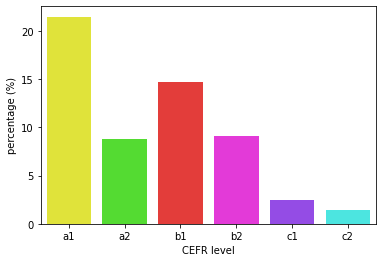

In [226]:
get_cefr(r"C:\Users\storr\Documents\0_coding\NLP\ex2_iy1", "EX3A Analysis")